In [1]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
##original_data####

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\RAHUL\Downloads\dataTraining_test.csv")

In [4]:
df.head()

,tree_dbh,curb_loc,health,steward,sidewalk,user_type,root_stone,root_other,trunk_wire,trnk_other,brch_light,brch_other,latitude,longitude
0,4,OnCurb,Good,None,NoDamage,TreesCount Staff,No,No,No,No,No,No,40.746433,-73.760804
1,11,OnCurb,Good,None,NoDamage,TreesCount Staff,No,No,No,No,No,No,40.823422,-73.952670
2,10,OnCurb,Fair,None,Damage,TreesCount Staff,Yes,No,No,No,No,No,40.740724,-73.883406
3,10,OnCurb,Good,None,Damage,Volunteer,Yes,No,No,Yes,No,No,40.697815,-73.947001
4,7,OnCurb,Good,None,Damage,TreesCount Staff,No,No,No,No,Yes,No,40.540792,-74.151754


In [5]:
data =pd.get_dummies(data=df, columns=['curb_loc', 'steward','sidewalk','user_type'])

In [6]:
data

,tree_dbh,health,root_stone,root_other,trunk_wire,trnk_other,brch_light,brch_other,latitude,longitude,...,curb_loc_OnCurb,steward_1or2,steward_3or4,steward_4orMore,steward_None,sidewalk_Damage,sidewalk_NoDamage,user_type_NYC Parks Staff,user_type_TreesCount Staff,user_type_Volunteer
0,4,Good,No,No,No,No,No,No,40.746433,-73.760804,...,1,0,0,0,1,0,1,0,1,0
1,11,Good,No,No,No,No,No,No,40.823422,-73.952670,...,1,0,0,0,1,0,1,0,1,0
2,10,Fair,Yes,No,No,No,No,No,40.740724,-73.883406,...,1,0,0,0,1,1,0,0,1,0
3,10,Good,Yes,No,No,Yes,No,No,40.697815,-73.947001,...,1,0,0,0,1,1,0,0,0,1
4,7,Good,No,No,No,No,Yes,No,40.540792,-74.151754,...,1,0,0,0,1,1,0,0,1,0
5,16,Good,No,No,No,No,No,No,40.657752,-73.835572,...,1,0,0,0,1,1,0,1,0,0
6,25,Good,No,No,No,No,No,No,40.657926,-73.911578,...,1,0,0,0,1,0,1,1,0,0
7,9,Good,Yes,No,No,No,Yes,No,40.620203,-73.943728,...,1,0,0,0,1,1,0,0,0,1
8,4,Good,No,No,No,No,No,No,40.711129,-73.899263,...,1,1,0,0,0,0,1,0,1,0
9,3,Good,No,No,No,No,No,No,40.731723,-73.945785,...,1,0,0,0,1,0,1,0,0,1


In [7]:
health = {'Good': 0,'Fair': 1 , 'Poor' : 2} 

In [8]:
data.health = [health[item] for item in data.health] 
print(data) 

        tree_dbh  health root_stone root_other trunk_wire trnk_other  \
0              4       0         No         No         No         No   
1             11       0         No         No         No         No   
2             10       1        Yes         No         No         No   
3             10       0        Yes         No         No        Yes   
4              7       0         No         No         No         No   
5             16       0         No         No         No         No   
6             25       0         No         No         No         No   
7              9       0        Yes         No         No         No   
8              4       0         No         No         No         No   
9              3       0         No         No         No         No   
10             5       0        Yes         No         No         No   
11            11       0        Yes         No         No        Yes   
12             4       0         No         No         No       

In [9]:
root_stone ={'Yes': 1,'No': 0}
root_other ={'Yes': 1,'No': 0}
trunk_wire ={'Yes': 1,'No': 0}
trnk_other ={'Yes': 1,'No': 0}
brch_light ={'Yes': 1,'No': 0}
brch_other ={'Yes': 1,'No': 0}

In [10]:
data.root_stone = [root_stone[item] for item in data.root_stone] 
data.root_other = [root_other[item] for item in data.root_other] 
data.trunk_wire = [trunk_wire[item] for item in data.trunk_wire] 
data.trnk_other = [trnk_other[item] for item in data.trnk_other] 
data.brch_light = [brch_light[item] for item in data.brch_light] 
data.brch_other = [brch_other[item] for item in data.brch_other] 

In [11]:
data = data.dropna()

In [12]:
cols=list(data.columns)

In [13]:
cols.remove('health')

In [14]:
X = data[cols]

In [15]:
y = data.health

In [16]:
print(len(y),len(X))

456520 456520


In [17]:
y = label_binarize(y, classes=[0,1,2])
n_classes = 3

#splitting training and test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=0)


In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators =200,random_state=0)
y_score = clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
rf_prediction =clf.predict(X_test)

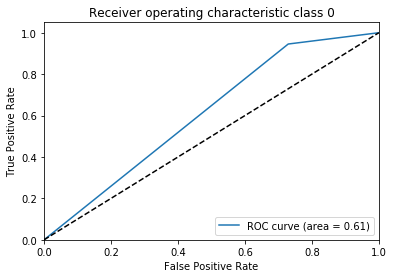

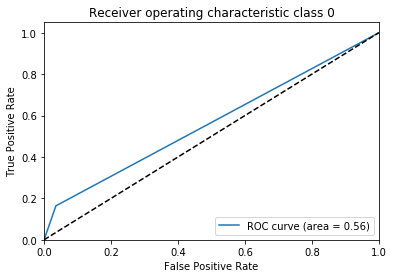

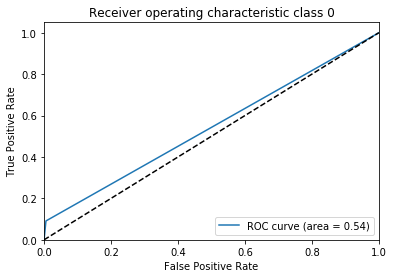

In [20]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], rf_prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
###downsampling###

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv(r"C:\Users\RAHUL\Downloads\dataDownTraining.csv")

In [25]:
df.head()

,tree_dbh,curb_loc,health,steward,sidewalk,user_type,root_stone,root_other,trunk_wire,trnk_other,brch_light,brch_other,latitude,longitude
0,24,OnCurb,Fair,None,NoDamage,TreesCount Staff,No,No,No,No,No,No,40.704514,-73.772174
1,13,OnCurb,Fair,1or2,NoDamage,NYC Parks Staff,No,No,No,No,No,No,40.558751,-74.149120
2,6,OnCurb,Fair,1or2,NoDamage,TreesCount Staff,No,No,No,No,No,No,40.583018,-74.085137
3,20,OffsetFromCurb,Fair,None,NoDamage,TreesCount Staff,No,No,No,No,No,Yes,40.828810,-73.874223
4,16,OnCurb,Fair,None,NoDamage,TreesCount Staff,No,No,No,No,Yes,No,40.653133,-73.901071


In [26]:
data =pd.get_dummies(data=df, columns=['curb_loc', 'steward','sidewalk','user_type'])

In [27]:
data

,tree_dbh,health,root_stone,root_other,trunk_wire,trnk_other,brch_light,brch_other,latitude,longitude,...,curb_loc_OnCurb,steward_1or2,steward_3or4,steward_4orMore,steward_None,sidewalk_Damage,sidewalk_NoDamage,user_type_NYC Parks Staff,user_type_TreesCount Staff,user_type_Volunteer
0,24,Fair,No,No,No,No,No,No,40.704514,-73.772174,...,1,0,0,0,1,0,1,0,1,0
1,13,Fair,No,No,No,No,No,No,40.558751,-74.149120,...,1,1,0,0,0,0,1,1,0,0
2,6,Fair,No,No,No,No,No,No,40.583018,-74.085137,...,1,1,0,0,0,0,1,0,1,0
3,20,Fair,No,No,No,No,No,Yes,40.828810,-73.874223,...,0,0,0,0,1,0,1,0,1,0
4,16,Fair,No,No,No,No,Yes,No,40.653133,-73.901071,...,1,0,0,0,1,0,1,0,1,0
5,2,Fair,No,No,No,No,No,No,40.843164,-73.845505,...,1,1,0,0,0,0,1,0,1,0
6,7,Fair,No,No,No,No,No,No,40.546982,-74.211984,...,1,0,0,0,1,0,1,1,0,0
7,13,Fair,Yes,No,No,No,Yes,No,40.629230,-73.948291,...,1,1,0,0,0,0,1,0,0,1
8,2,Fair,No,No,No,No,No,No,40.677791,-73.864222,...,1,0,0,0,1,0,1,1,0,0
9,3,Fair,No,No,No,No,No,No,40.697258,-73.963771,...,1,0,0,0,1,0,1,1,0,0


In [28]:
health = {'Good': 0,'Fair': 1 , 'Poor' : 2} 

In [29]:
data.health = [health[item] for item in data.health] 
print(data) 

       tree_dbh  health root_stone root_other trunk_wire trnk_other  \
0            24       1         No         No         No         No   
1            13       1         No         No         No         No   
2             6       1         No         No         No         No   
3            20       1         No         No         No         No   
4            16       1         No         No         No         No   
5             2       1         No         No         No         No   
6             7       1         No         No         No         No   
7            13       1        Yes         No         No         No   
8             2       1         No         No         No         No   
9             3       1         No         No         No         No   
10           21       1        Yes         No         No         No   
11           29       1        Yes         No         No         No   
12            6       1         No         No         No         No   
13    

In [30]:
root_stone ={'Yes': 1,'No': 0}
root_other ={'Yes': 1,'No': 0}
trunk_wire ={'Yes': 1,'No': 0}
trnk_other ={'Yes': 1,'No': 0}
brch_light ={'Yes': 1,'No': 0}
brch_other ={'Yes': 1,'No': 0}

In [31]:
data.root_stone = [root_stone[item] for item in data.root_stone] 
data.root_other = [root_other[item] for item in data.root_other] 
data.trunk_wire = [trunk_wire[item] for item in data.trunk_wire] 
data.trnk_other = [trnk_other[item] for item in data.trnk_other] 
data.brch_light = [brch_light[item] for item in data.brch_light] 
data.brch_other = [brch_other[item] for item in data.brch_other] 

In [32]:
data = data.dropna()

In [33]:
cols=list(data.columns)

In [34]:
cols.remove('health')

In [35]:
X = data[cols]

In [36]:
y = data.health

In [37]:
print(len(y),len(X))

56079 56079


In [38]:
y = label_binarize(y, classes=[0,1,2])
n_classes = 3

#splitting training and test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=0)


In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators =200,random_state=0)
y_score = clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
rf_prediction =clf.predict(X_test)

In [ ]:
###Upsampling###

In [42]:
df = pd.read_csv(r"C:\Users\RAHUL\Downloads\dataUpTraining.csv")

In [43]:
df.head()

,tree_dbh,curb_loc,health,steward,sidewalk,user_type,root_stone,root_other,trunk_wire,trnk_other,brch_light,brch_other,latitude,longitude
0,10,OnCurb,Fair,None,Damage,TreesCount Staff,Yes,No,No,No,No,No,40.740724,-73.883406
1,20,OnCurb,Fair,None,Damage,NYC Parks Staff,No,Yes,Yes,No,Yes,No,40.706509,-73.859726
2,14,OnCurb,Fair,None,NoDamage,TreesCount Staff,No,No,No,No,No,No,40.732575,-73.730071
3,7,OnCurb,Fair,None,NoDamage,TreesCount Staff,No,No,No,No,No,No,40.638135,-73.972982
4,4,OnCurb,Fair,1or2,NoDamage,NYC Parks Staff,No,No,No,No,No,No,40.836753,-73.946641


In [44]:
data =pd.get_dummies(data=df, columns=['curb_loc', 'steward','sidewalk','user_type'])

In [45]:
data

,tree_dbh,health,root_stone,root_other,trunk_wire,trnk_other,brch_light,brch_other,latitude,longitude,...,curb_loc_OnCurb,steward_1or2,steward_3or4,steward_4orMore,steward_None,sidewalk_Damage,sidewalk_NoDamage,user_type_NYC Parks Staff,user_type_TreesCount Staff,user_type_Volunteer
0,10,Fair,Yes,No,No,No,No,No,40.740724,-73.883406,...,1,0,0,0,1,1,0,0,1,0
1,20,Fair,No,Yes,Yes,No,Yes,No,40.706509,-73.859726,...,1,0,0,0,1,1,0,1,0,0
2,14,Fair,No,No,No,No,No,No,40.732575,-73.730071,...,1,0,0,0,1,0,1,0,1,0
3,7,Fair,No,No,No,No,No,No,40.638135,-73.972982,...,1,0,0,0,1,0,1,0,1,0
4,4,Fair,No,No,No,No,No,No,40.836753,-73.946641,...,1,1,0,0,0,0,1,1,0,0
5,3,Fair,No,No,No,No,No,No,40.743758,-73.951187,...,1,1,0,0,0,0,1,0,1,0
6,3,Fair,No,No,No,No,No,No,40.674157,-73.887933,...,1,0,0,0,1,1,0,1,0,0
7,17,Fair,No,No,No,No,No,No,40.744790,-73.706075,...,1,1,0,0,0,0,1,1,0,0
8,7,Fair,No,No,No,No,No,No,40.733222,-73.889646,...,1,0,0,0,1,0,1,0,1,0
9,19,Fair,No,No,No,No,Yes,No,40.645683,-73.895067,...,1,0,0,0,1,1,0,0,0,1


In [46]:
health = {'Good': 0,'Fair': 1 , 'Poor' : 2} 

In [47]:
data.health = [health[item] for item in data.health] 
print(data) 

         tree_dbh  health root_stone root_other trunk_wire trnk_other  \
0              10       1        Yes         No         No         No   
1              20       1         No        Yes        Yes         No   
2              14       1         No         No         No         No   
3               7       1         No         No         No         No   
4               4       1         No         No         No         No   
5               3       1         No         No         No         No   
6               3       1         No         No         No         No   
7              17       1         No         No         No         No   
8               7       1         No         No         No         No   
9              19       1         No         No         No         No   
10              3       1         No         No         No         No   
11             16       1         No         No         No         No   
12              9       1         No         No    

In [48]:
root_stone ={'Yes': 1,'No': 0}
root_other ={'Yes': 1,'No': 0}
trunk_wire ={'Yes': 1,'No': 0}
trnk_other ={'Yes': 1,'No': 0}
brch_light ={'Yes': 1,'No': 0}
brch_other ={'Yes': 1,'No': 0}

In [49]:
data.root_stone = [root_stone[item] for item in data.root_stone] 
data.root_other = [root_other[item] for item in data.root_other] 
data.trunk_wire = [trunk_wire[item] for item in data.trunk_wire] 
data.trnk_other = [trnk_other[item] for item in data.trnk_other] 
data.brch_light = [brch_light[item] for item in data.brch_light] 
data.brch_other = [brch_other[item] for item in data.brch_other] 

In [50]:
data = data.dropna()

In [51]:
cols=list(data.columns)

In [52]:
cols.remove('health')

In [53]:
X = data[cols]

In [54]:
y = data.health

In [55]:
print(len(y),len(X))

1109586 1109586


In [56]:
y = label_binarize(y, classes=[0,1,2])
n_classes = 3

#splitting training and test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=0)


In [57]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators =200,random_state=0)
y_score = clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
rf_prediction =clf.predict(X_test)